In [1]:
import numpy as np

In [2]:
from scipy import signal 

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
fs = 102400
duration_time = 0.001
duration_count = int(duration_time*fs)
time_s = np.arange(duration_count)/fs
f = (10000-3000)/duration_time*time_s + 3000
s = np.sin(2*np.pi*f*time_s)
window = signal.get_window("hann", len(s), True)
window_s = s*window
duration_total = int(0.005*fs)
time = np.arange(duration_total)/fs
s_origin = np.concatenate((window_s, np.zeros(duration_total-len(s))))

<IPython.core.display.Javascript object>


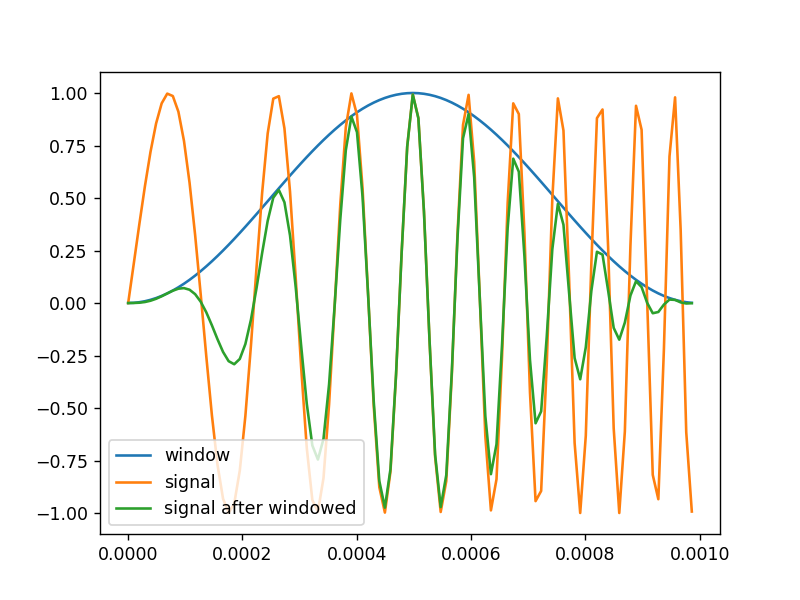

In [5]:
fig, ax = plt.subplots()
ax.plot(time_s, window, label="window")
ax.plot(time_s, s, label="signal")
ax.plot(time_s, window_s, label="signal after windowed")
ax.legend()

C:\Users\dindong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 102, using nperseg = 102
  warnings.warn('nperseg = {0:d} is greater than input length '


<IPython.core.display.Javascript object>


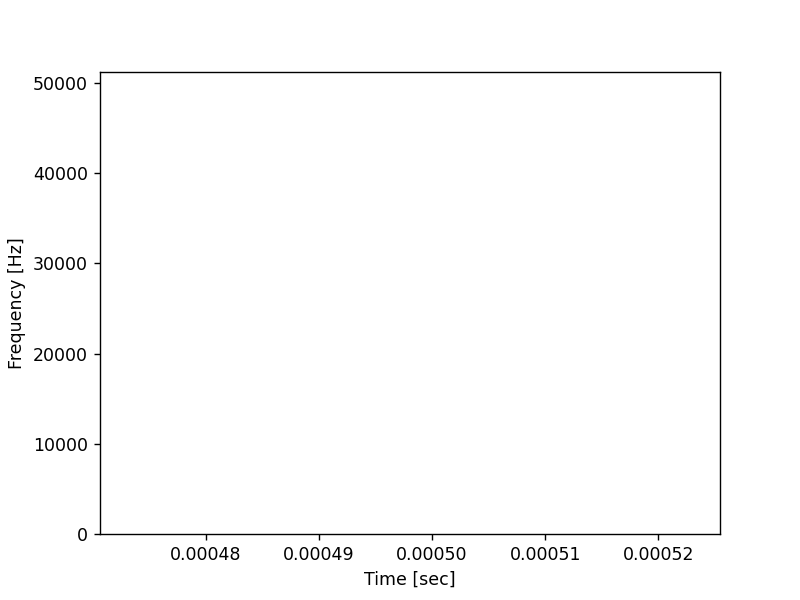

In [45]:
%matplotlib notebook
f, t, Sxx= signal.spectrogram(s, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

<IPython.core.display.Javascript object>


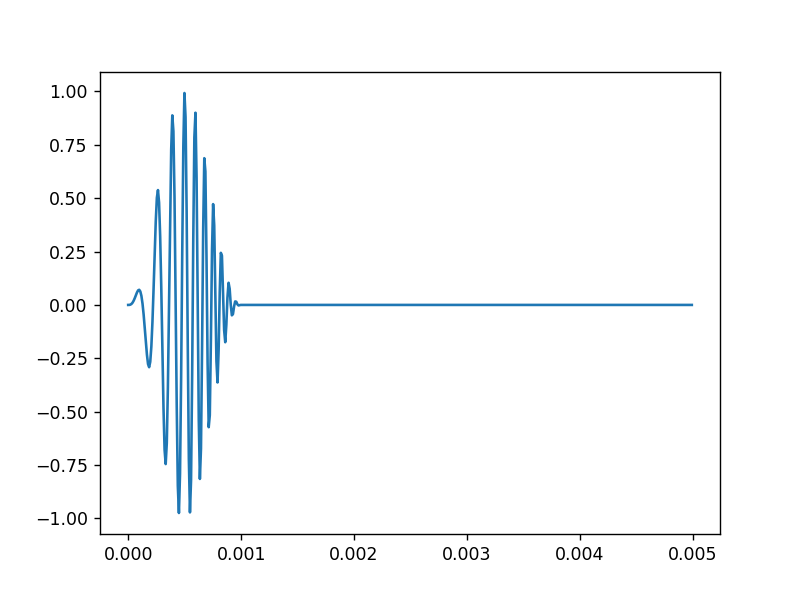

In [6]:
fig, ax = plt.subplots()
ax.plot(time, s_origin)

In [7]:
time_delay_1 = 0.002
time_delay_2 = 0.0025
alpha_1 = 0.5
alpha_2 = 0.1
s_1 = np.concatenate((np.zeros(int(time_delay_1*fs)), alpha_1*window_s))
s_1 = np.concatenate((s_1, np.zeros(duration_total-len(s_1))))
s_2 = np.concatenate((np.zeros(int(time_delay_2*fs)), alpha_2*window_s))
s_2 = np.concatenate((s_2, np.zeros(duration_total-len(s_2))))
np.random.seed(0)
signal_distorted = s_origin + s_1 + s_2 + 0.005*np.random.randn(len(s_origin))

<IPython.core.display.Javascript object>


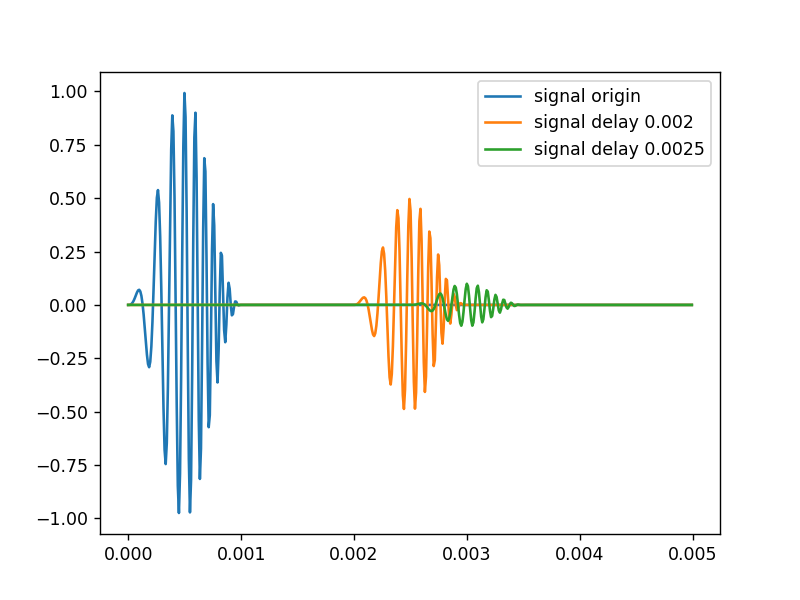

In [8]:
fig, ax = plt.subplots()
ax.plot(time, s_origin, label="signal origin")
ax.plot(time, s_1, label="signal delay {}".format(time_delay_1))
ax.plot(time, s_2, label="signal delay {}".format(time_delay_2))
ax.legend()

<IPython.core.display.Javascript object>


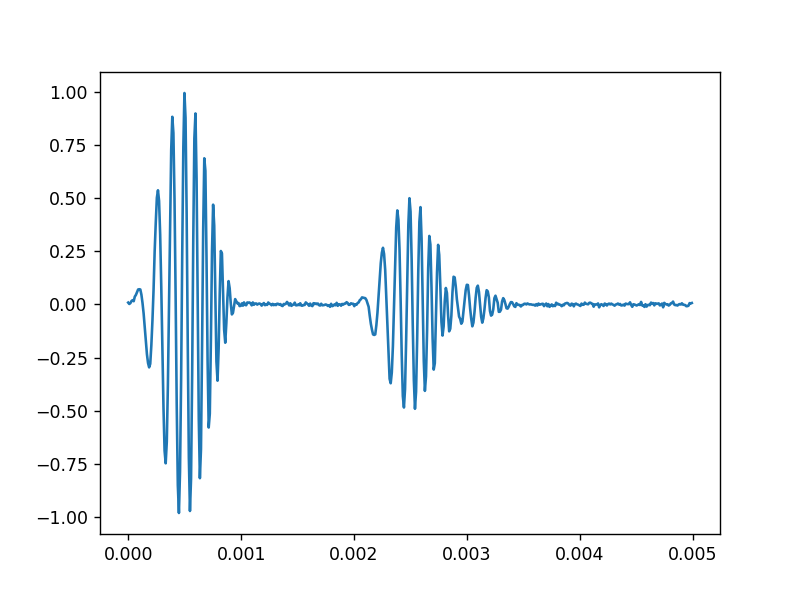

In [9]:
fig, ax = plt.subplots()
ax.plot(time, signal_distorted)

In [10]:
template = window_s
fir_coeff = template[::-1]

<IPython.core.display.Javascript object>


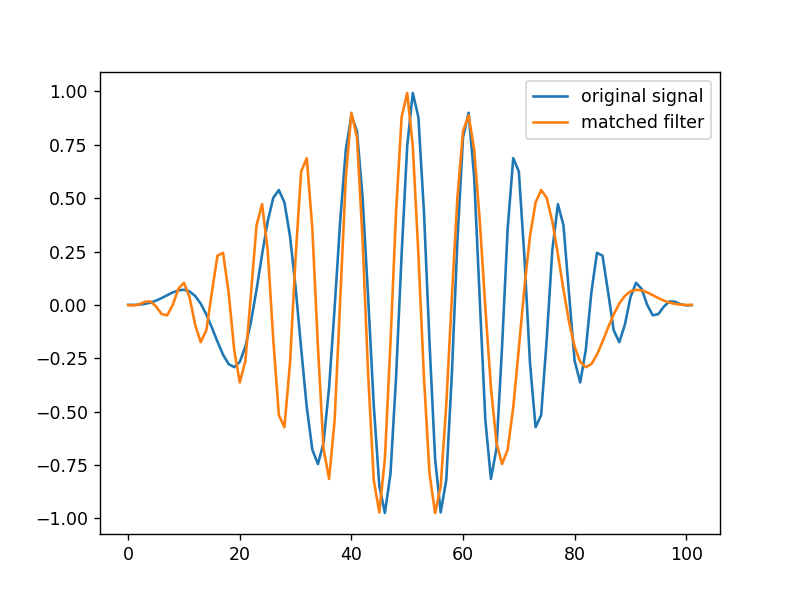

In [11]:
fig, ax = plt.subplots()
ax.plot(window_s, label="original signal")
ax.plot(fir_coeff, label="matched filter")
ax.legend()

<IPython.core.display.Javascript object>


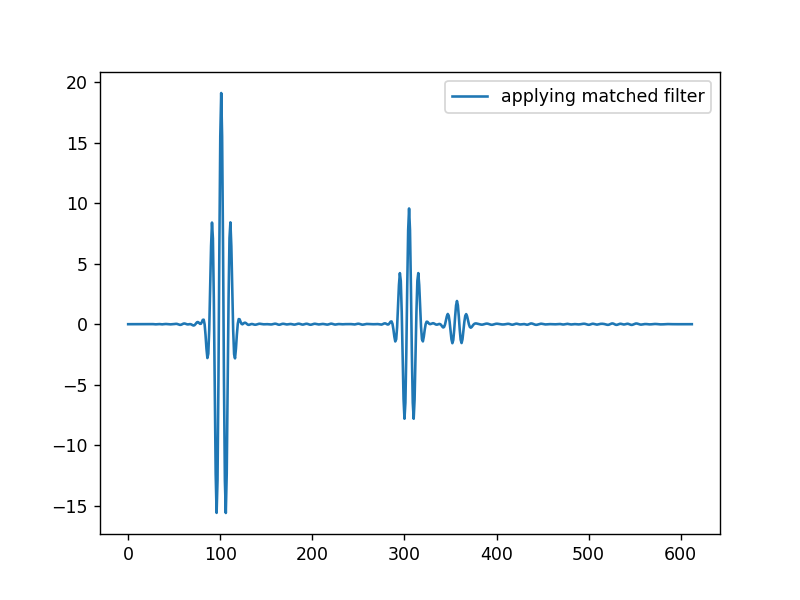

In [12]:
# det_1 = signal.lfilter(fir_coeff, 1, signal_distorted)
det_2 = np.convolve(fir_coeff, signal_distorted, "full")
fig, ax = plt.subplots()
ax.plot(det_2, label="applying matched filter")
ax.legend()

<IPython.core.display.Javascript object>


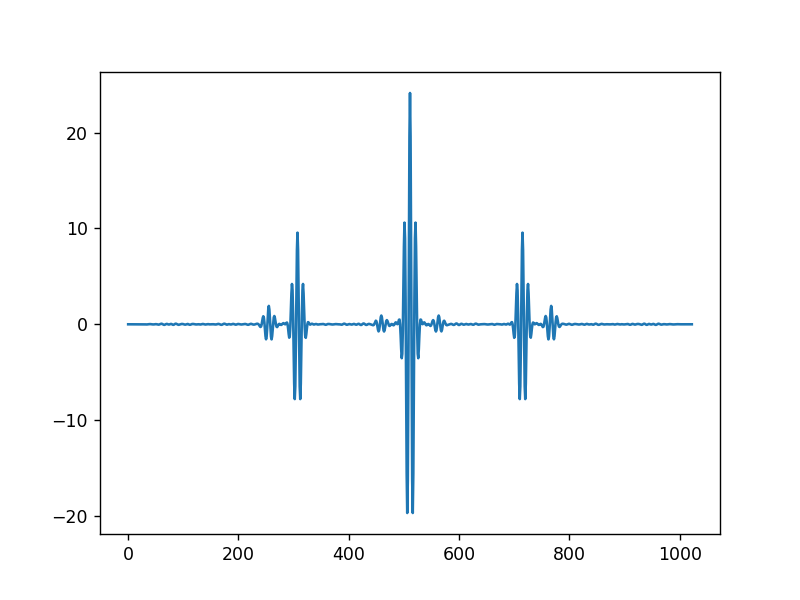

In [13]:
auto_correlation = np.correlate(signal_distorted, signal_distorted, "full")
fig, ax = plt.subplots()
ax.plot(auto_correlation)

In [15]:
len(det_2)

613

In [19]:
signal_1 = det_2[:200]
signal_2 = det_2[250:350]
signal_3 = det_2[350:450]

In [22]:
arg_1 = np.argmax(signal_1)
arg_2 = np.argmax(signal_2)+250
arg_3 = np.argmax(signal_3)+350

In [23]:
arg_2-arg_1

204

In [25]:
arg_3-arg_1

256

In [28]:
204/102400-0.002

-7.812500000000007e-06

In [27]:
256/102400

0.0025